<a href="https://colab.research.google.com/github/dniggl/Insights/blob/main/Using_proxies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is a Proxy Server?**

A proxy server is a computer on the internet that accepts the incoming requests from the client and forwards those requests to the destination server. Proxy servers use a different IP address on behalf of the user, concealing the user's real address from web servers.  

Proxy servers have many different uses including facilitating anonymous Internet browsing, bypassing geo-blocking and regulating web requests.

**How does a Proxy Server Work?**

Proxy servers have many different uses including facilitating anonymous internet browsing, bypassing geo-blocking and regulating web requests.

A standard proxy server works as follows:

1.   A user enters a website's URL into their browser.
2.   The proxy server receives the user's request.
3.   The proxy server forwards the request to the web server.
4.   The web server sends a response (website data) back to the proxy server.
5.   The proxy server forwards the response to the user.

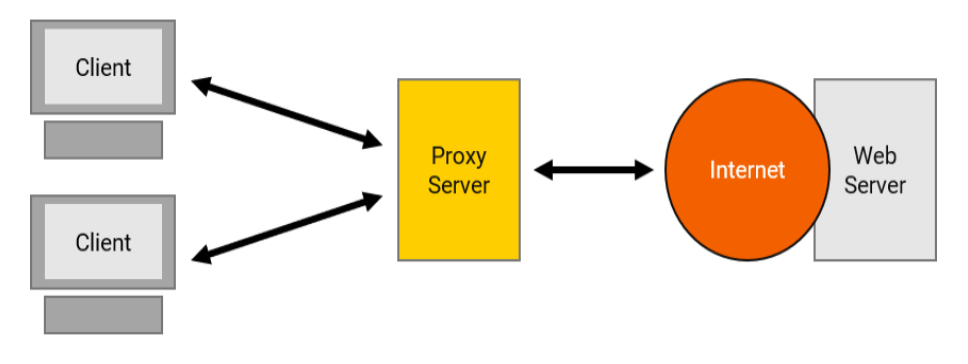

**Why use a Proxy Server?**

Sometimes, when you access and try to scrape a webpage, the website recognizes an unfamiliar bot is crawling their website and they will temporarily or permanently block your IP address. This action prevents you from getting the data you need. 

Listed below are some reasons for using a proxy server.

1.   Your real IP address will be hidden. The website you access will be unable to know your real IP address, because they will receive the proxy server’s IP address. In adition, IP addresses will be rotated where a different IP address will be sent for each request to a website.
2.   Access geo-blocked or restricted content. Many websites restrict access to their websites based on geographical location. The proxy server can send a IP address with a location that will be accepted by geo-blocked websites.    
3.   Load times may be reduced. When a proxy server accesses web pages, they store the contents in cache memory. When a cached page is subsequently requested, the contents can displayed faster to the user. In addition, the proxy servers will balance the requests across multiple servers to prevent overloads. 
4.   Malicious websites can be filtered out. The proxy server administrator can identify websites that contain malware or phishing links and can prevent proxy users from accessing those websites.



**Types of Proxies**

There are many different types of proxies that cover different types of configurations. I will provide a brief overview of the most common proxies.

1.   **Transparent Proxies**: These pass all of your information to the web server along with the proxy's IP address. These proxies don't offer any kind of privacy protection.
2.   **Anonymous Proxies**: These never pass your IP address to the web server  although they will identify themselves as a proxy in the request. This helps keep your browsing activity private.
3.   **Residential Proxies**: These proxies use real IP addresses of computers. These are the best types of proxies to use because they look like regular clients to servers. They also tend to be undetectable and they get around some of the geographic restrictions.
4.   **Data Center Proxies**: These proxies have computer generated IP addresses that aren't attached to a real device. It's like having a proxy in the cloud.  One advantage of this proxy is their speed and performance. 
5.   **Public Proxies**: These proxies are the most insecure, unreliable proxies available. They can go down at any moment and many are set up by hackers to steal data. The only reason people still use them is because they are free.
6.   **Private Proxies**: These proxies are defined by the provider offering the service. This could mean your proxy can only be used by one client at a time or that your proxy needs authentication before it can be used. 

**Using a Proxy in a Requests Module**

The following steps illustrate the use of a proxy in a request.   

*   Import the requests module.
*   Set up a proxy IP address and port.
*   Initialize a URL. 
*   Send a GET request to the url and pass the proxy.
*   Return the proxy server address of the current request or a connection error if not successful.

In [ ]:
import requests
  
# Enter a proxy IP address and port. 
proxy = 'http://129.226.33.104:3218'
# Initialize a URL.
url = 'https://ipecho.net/plain'
  
# Send a GET request to the url and pass the proxy as parameter.
page = requests.get(url,
                    proxies={"http": proxy, "https": proxy})
  
# Prints the content of the requested url.
print(page.text)

129.226.33.104


Same process but using multiple proxy IP addresses and ports.

In [ ]:
import requests
from itertools import cycle
import traceback
# Enter proxy ip's and ports in a list. 
proxies = {
    'http://129.226.33.104:3218', 
    'http://169.57.1.85:8123', 
    'http://85.25.91.141:15333', 
    'http://103.149.162.195:80', 
    'http://8.218.213.95:10809'
}
 
proxy_pool = cycle(proxies)
# Initialize a URL.
url = 'https://httpbin.org/ip'

# Iterate through the proxies and check if it is working.
for i in range(1,6):
 # Get a proxy from the pool
 proxy = next(proxy_pool)
 print("Request #%d"%i)
 try:
  response = requests.get(url,proxies={"http": proxy, "https": proxy}, timeout=30)
  print(response.json())
 except:
  # Most free proxies will often get connection errors. You will need to retry the request using another proxy.  
  print("Skipping. Connnection error")

Request #1
Skipping. Connnection error
Request #2
{'origin': '169.57.1.85'}
Request #3
{'origin': '87.123.240.128'}
Request #4
Skipping. Connnection error
Request #5
Skipping. Connnection error
